# HR Analytics: Employee Attrition 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Missing Values**

In [7]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [15]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1321,47,0,Travel_Rarely,207,Research & Development,9,4,Life Sciences,1,1856,...,3,80,0,7,2,3,2,2,2,0
856,20,0,Travel_Rarely,805,Research & Development,3,3,Life Sciences,1,1198,...,1,80,0,2,2,2,2,2,1,2
806,52,0,Travel_Rarely,994,Research & Development,7,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0
1409,40,0,Travel_Frequently,692,Research & Development,11,3,Technical Degree,1,1985,...,1,80,1,10,2,4,10,9,9,4
169,32,0,Travel_Rarely,120,Research & Development,6,5,Life Sciences,1,231,...,1,80,0,8,2,3,5,4,1,4
842,28,1,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,1175,...,4,80,0,1,4,2,1,1,0,0
1363,33,0,Travel_Rarely,217,Sales,10,4,Marketing,1,1924,...,2,80,0,10,2,2,10,4,0,9
188,34,0,Travel_Frequently,1069,Research & Development,2,1,Life Sciences,1,256,...,3,80,0,10,2,2,10,9,1,9
848,35,0,Travel_Frequently,636,Research & Development,4,4,Other,1,1185,...,2,80,1,2,2,4,2,2,2,2
1164,40,0,Travel_Rarely,448,Research & Development,16,3,Life Sciences,1,1641,...,4,80,0,18,2,2,4,2,3,3


In [14]:
print(f" Unique values \n Standard Hours: {df.StandardHours.nunique()}, Employee Count:  {df.EmployeeCount.nunique()}, Over18: {df.Over18.nunique()}")

 Unique values 
 Standard Hours: 1, Employee Count:  1, Over18: 1


In [16]:
df.Attrition.replace(to_replace = {"Yes" : 1 , "No" : 0}, inplace = True)

# Dropping columns that don't appear to be useful
df = df.drop(columns = ["StandardHours", "EmployeeCount", "Over18"])

## Exploratory Data Analysis (EDA)

In [17]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

<AxesSubplot:>

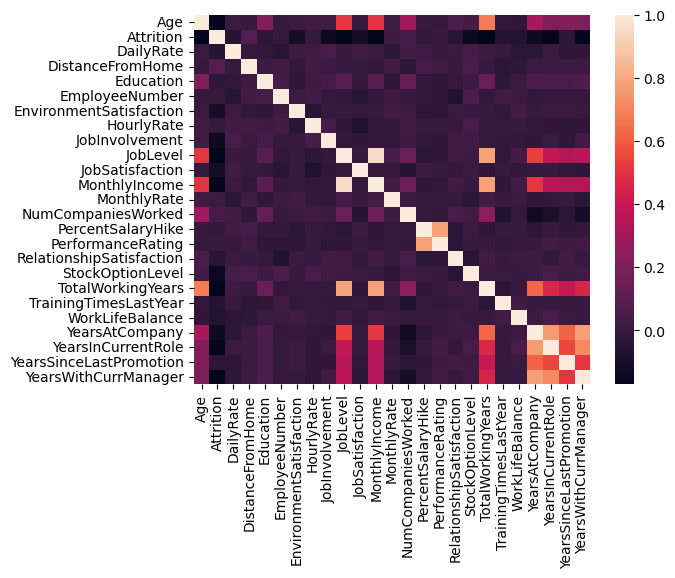

In [22]:
corr = df.corr()
sns.heatmap(corr)

<AxesSubplot:title={'center':'Attrition Count'}>

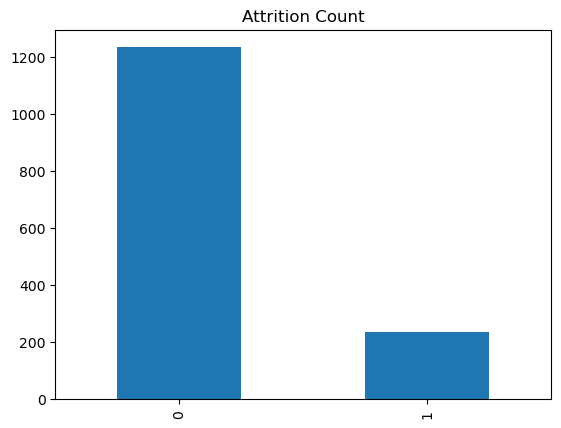

In [30]:
df.Attrition.value_counts().plot(kind = 'bar', title = "Attrition Count")

In [31]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [33]:
attrition = df[(df.Attrition == 1)]
no_attrition = df[(df.Attrition == 0)]

In [51]:
def plot_distribution(var_select): 
# Calculate the correlation coefficient between the new variable and the target
    corr = df['Attrition'].corr(df[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    
    fig = ff.create_distplot(hist_data, group_labels, show_hist = True, curve_type='kde')
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

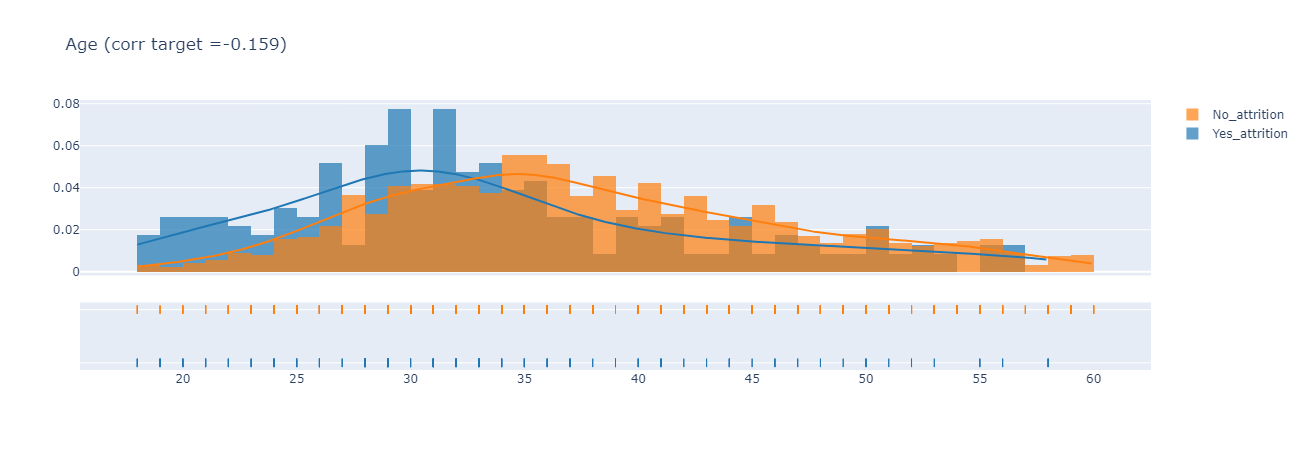

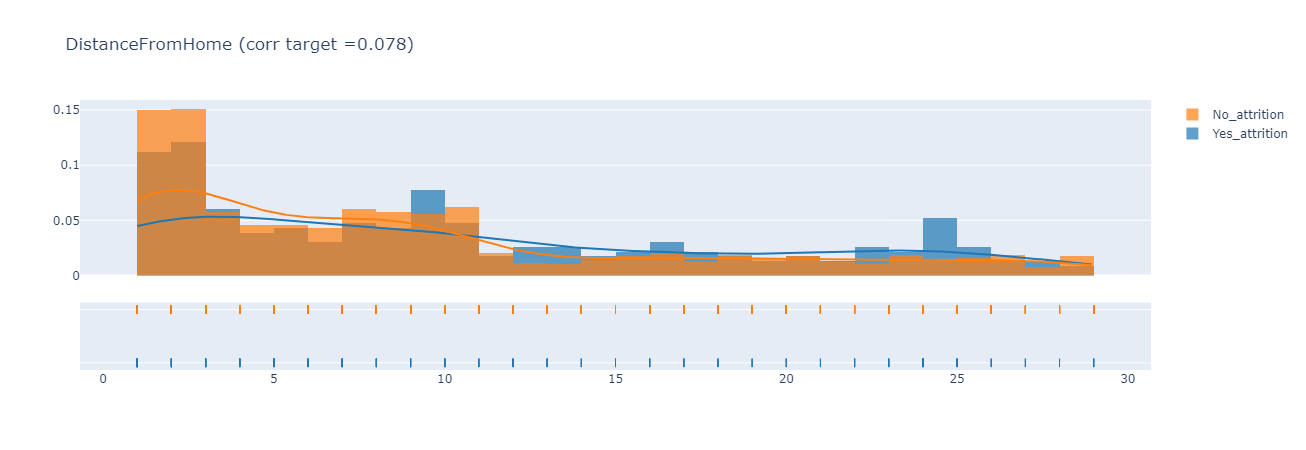

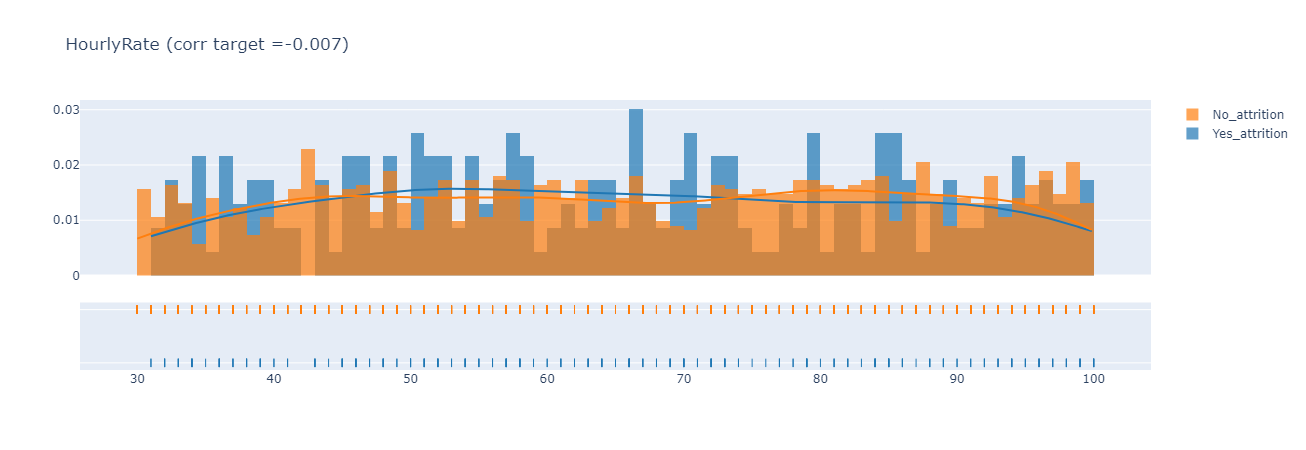

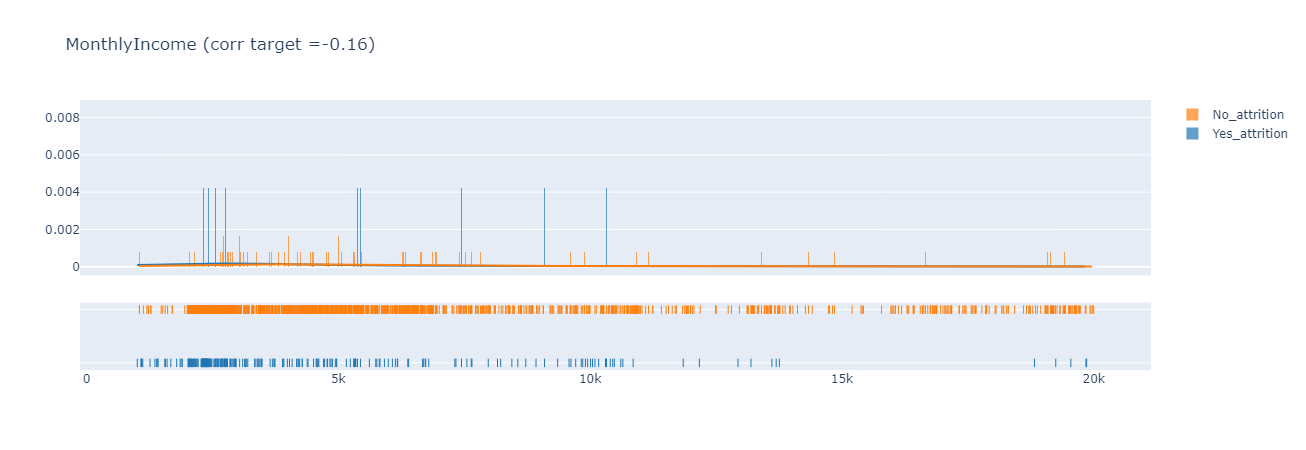

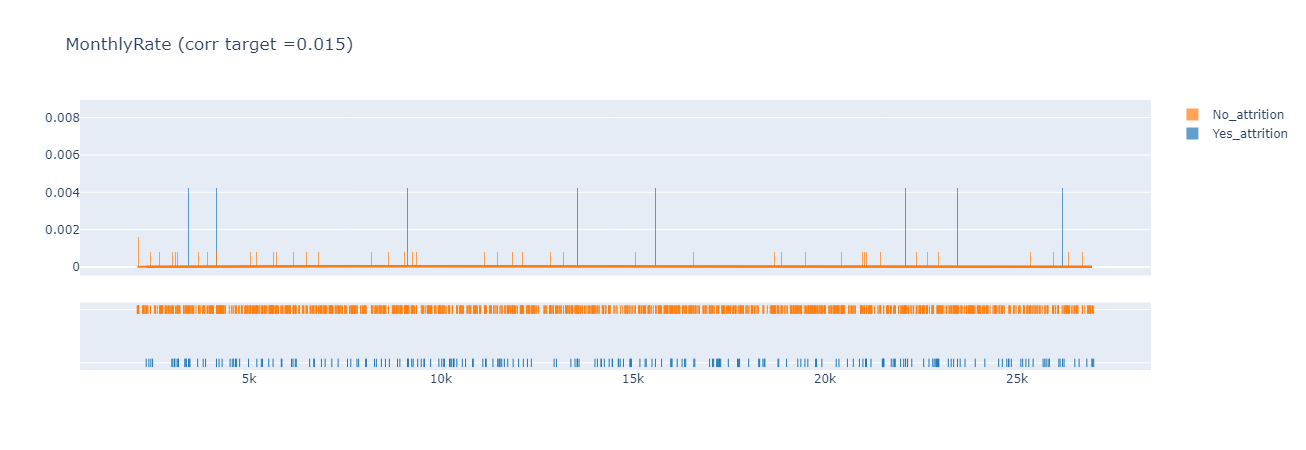

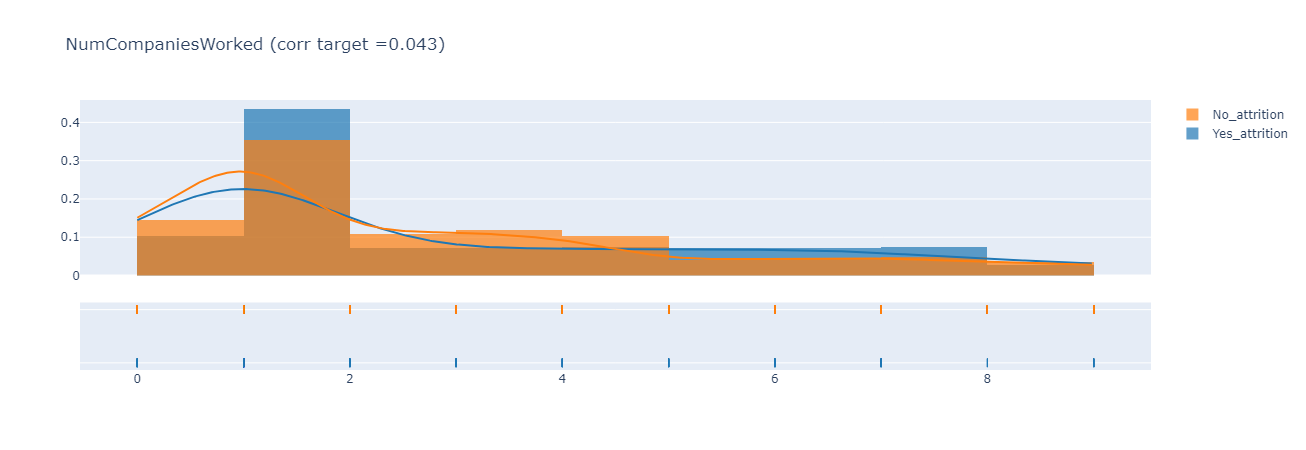

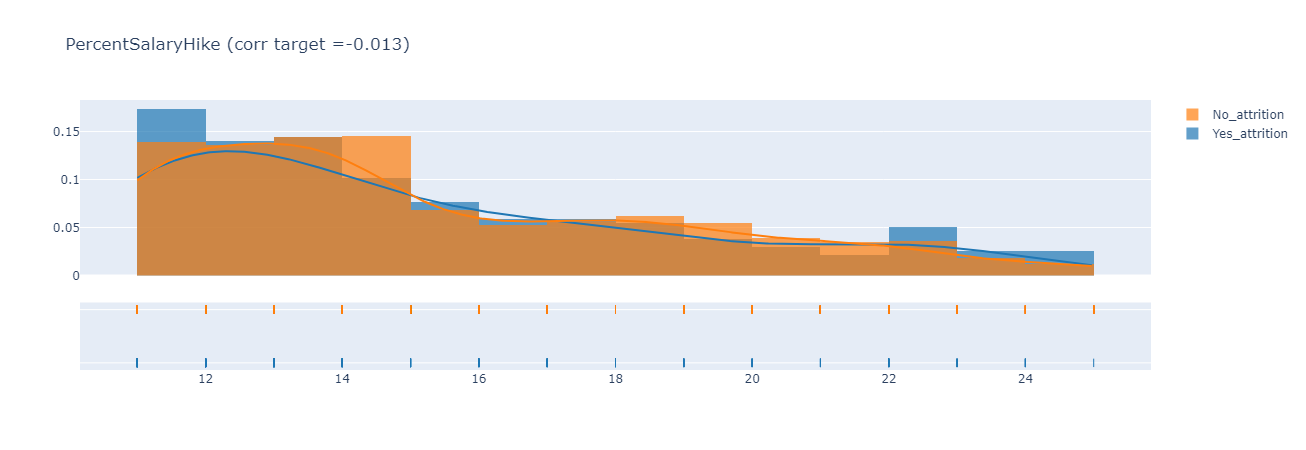

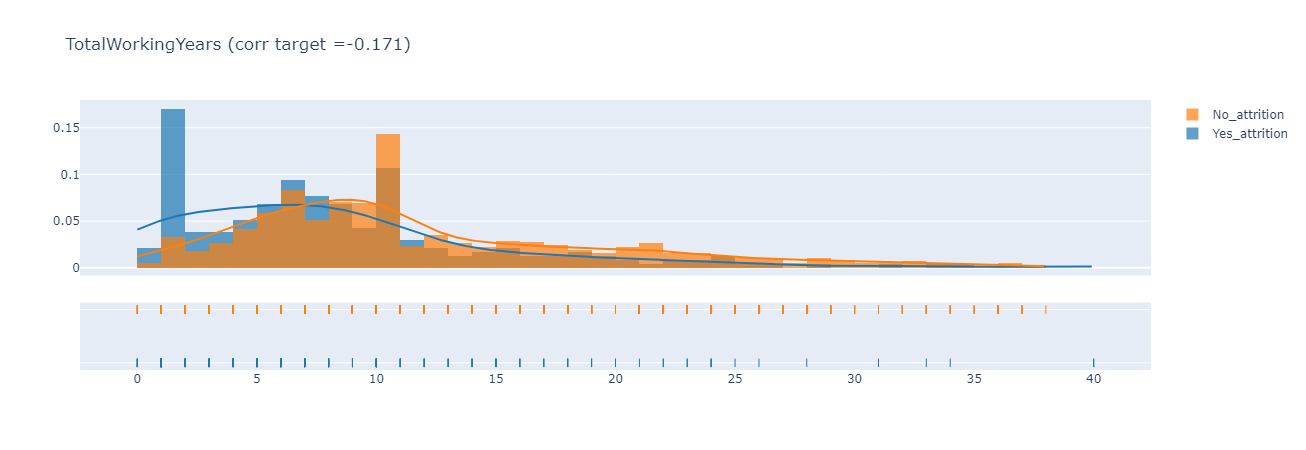

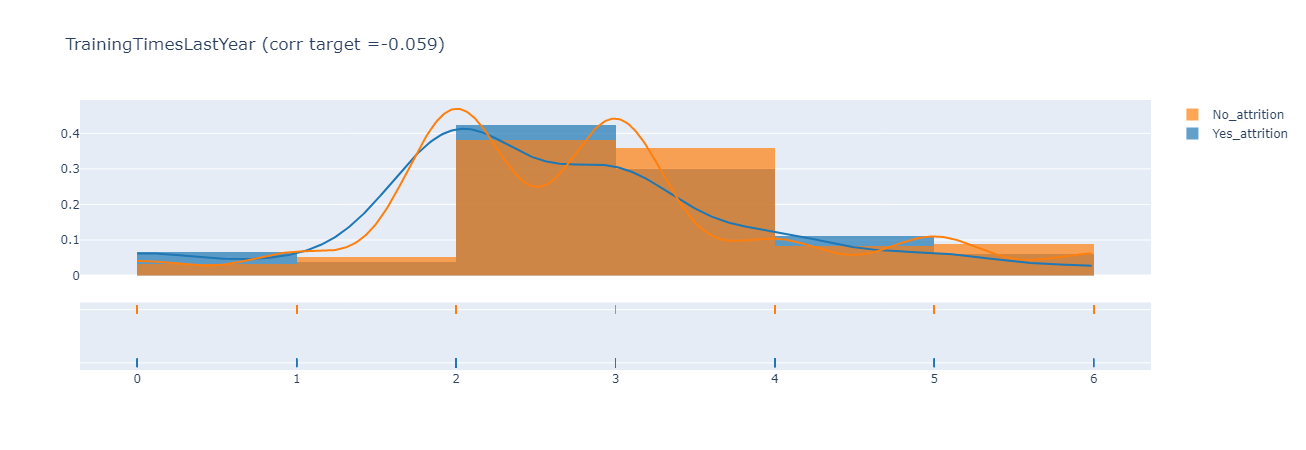

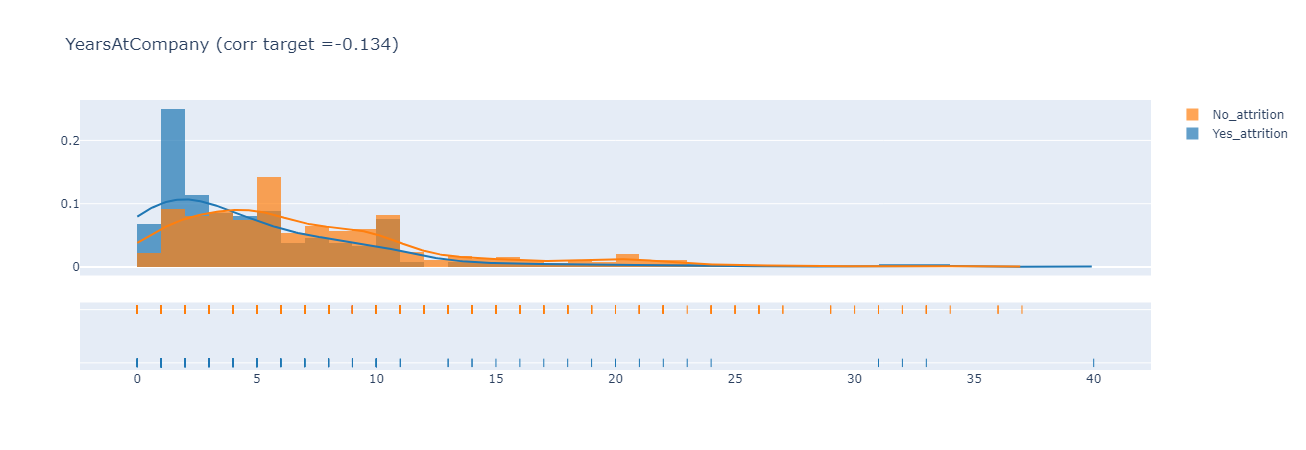

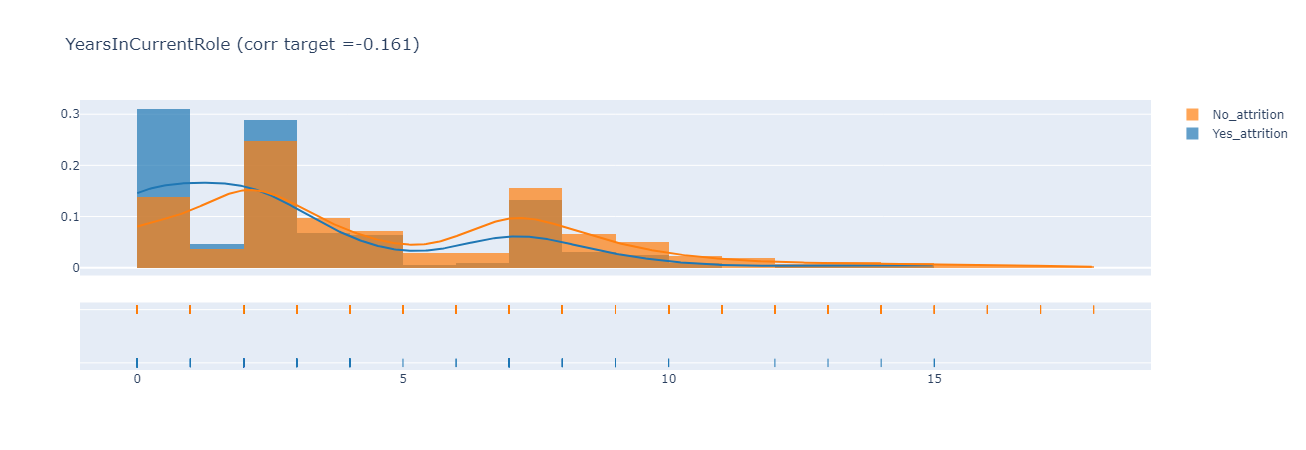

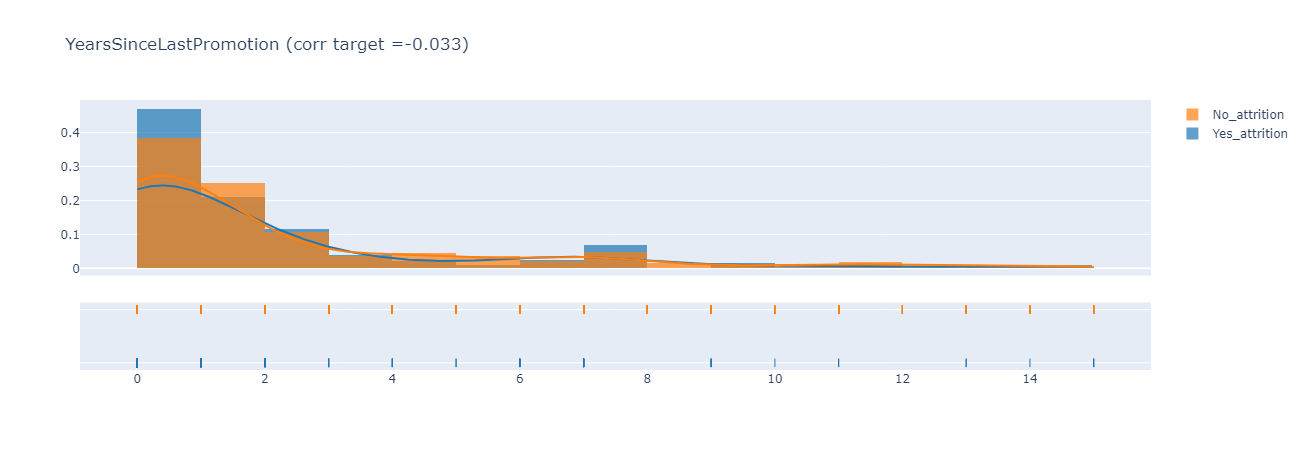

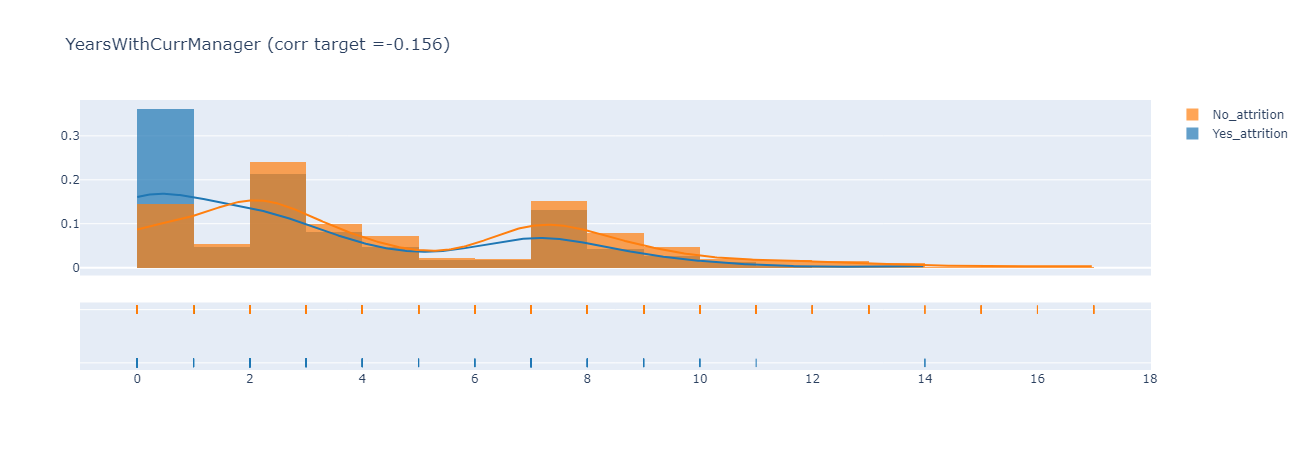

In [53]:
graph = ["Age", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears",
        "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]

for i in graph:
    plot_distribution(i)

In [64]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [56]:
dummy = [col for col in df.drop("Attrition", axis = 1).columns if df[col].nunique() < 20]
data = pd.get_dummies(df, columns = dummy, drop_first = True)
data

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,41,1,1102,1,1,94,5993,19479,8,6,...,0,0,0,0,0,0,0,0,0,0
1,49,0,279,8,2,61,5130,24907,10,10,...,0,0,0,0,0,0,0,0,0,0
2,37,1,1373,2,4,92,2090,2396,7,0,...,0,0,0,0,0,0,0,0,0,0
3,33,0,1392,3,5,56,2909,23159,8,8,...,0,0,0,0,0,0,0,0,0,0
4,27,0,591,2,7,40,3468,16632,6,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2061,41,2571,12290,17,5,...,0,0,0,0,0,0,0,0,0,0
1466,39,0,613,6,2062,42,9991,21457,9,7,...,0,0,0,0,0,0,0,0,0,0
1467,27,0,155,4,2064,87,6142,5174,6,6,...,0,0,0,0,0,0,0,0,0,0
1468,49,0,1023,2,2065,63,5390,13243,17,9,...,1,0,0,0,0,0,0,0,0,0


In [59]:
X = data.drop("Attrition", axis = 'columns')
y = data["Attrition"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [63]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns )
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns )
X_train.sample(5)

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
410,-0.220759,1.166848,0.824084,-0.730933,0.295566,0.228952,0.006789,-0.181051,0.131221,-0.485071,...,-0.291326,-0.204034,-0.117444,-0.13484,-0.101535,-0.105726,-0.065344,-0.065344,-0.041274,-0.077382
1136,-1.089757,-0.193714,1.683453,1.402037,-1.474569,-0.629324,-1.012483,-0.306665,0.289332,-0.485071,...,3.432580,-0.204034,-0.117444,-0.13484,-0.101535,-0.105726,-0.065344,-0.065344,-0.041274,-0.077382
955,-0.112135,0.265600,-0.035285,-0.542337,-0.884524,0.483792,-0.043775,0.195791,-0.659332,-0.485071,...,-0.291326,-0.204034,-0.117444,-0.13484,-0.101535,-0.105726,-0.065344,-0.065344,-0.041274,-0.077382
10,0.648238,-1.395377,-0.894654,1.258504,1.524826,-0.629534,-1.290517,-0.181051,0.289332,-0.485071,...,3.432580,-0.204034,-0.117444,-0.13484,-0.101535,-0.105726,-0.065344,-0.065344,-0.041274,-0.077382
324,1.734485,-1.747931,1.683453,-0.205201,0.295566,1.622286,0.834729,2.708072,0.763663,-0.485071,...,3.432580,-0.204034,-0.117444,-0.13484,-0.101535,-0.105726,-0.065344,-0.065344,-0.041274,-0.077382


### Logistic Regression

In [66]:
LR = LogisticRegression(solver = 'liblinear', penalty = 'l1')
LR.fit(X_train, y_train)

print('TRAINING RESULTS')
print('--'*10)
print('Classification report')
print(classification_report(y_train,LR.predict(X_train)))
print('Accuracy score:',accuracy_score(y_train, LR.predict(X_train)))
print('ROC AUC: ', roc_auc_score(y_train,LR.predict(X_train)))
print('\nTESTING RESULTS')
print('=-='*10)
print('Classification report')
print(classification_report(y_test,LR.predict(X_test)))
print('Accuracy score:',accuracy_score(y_test, LR.predict(X_test)))
print('ROC AUC: ', roc_auc_score(y_test,LR.predict(X_test)))

TRAINING RESULTS
--------------------
Classification report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       986
           1       0.84      0.63      0.72       190

    accuracy                           0.92      1176
   macro avg       0.89      0.80      0.84      1176
weighted avg       0.92      0.92      0.92      1176

Accuracy score: 0.9209183673469388
ROC AUC:  0.8041261876801538

TESTING RESULTS
=-==-==-==-==-==-==-==-==-==-=
Classification report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       247
           1       0.58      0.40      0.48        47

    accuracy                           0.86       294
   macro avg       0.73      0.67      0.70       294
weighted avg       0.84      0.86      0.85       294

Accuracy score: 0.8571428571428571
ROC AUC:  0.6737875786028082


### Random Forest Classifier

In [73]:
RF = RandomForestClassifier(n_estimators = 350, bootstrap = False)
RF.fit(X_train, y_train)

print('TRAINING RESULTS')
print('--'*10)
print('Classification report')
print(classification_report(y_train,RF.predict(X_train)))
print('Accuracy score:',accuracy_score(y_train, RF.predict(X_train)))
print('ROC AUC: ', roc_auc_score(y_train,RF.predict(X_train)))
print('\nTESTING RESULTS')
print('=-='*10)
print('Classification report')
print(classification_report(y_test,RF.predict(X_test)))
print('Accuracy score:',accuracy_score(y_test, RF.predict(X_test)))
print('ROC AUC: ', roc_auc_score(y_test,RF.predict(X_test)))

TRAINING RESULTS
--------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

Accuracy score: 1.0
ROC AUC:  1.0

TESTING RESULTS
=-==-==-==-==-==-==-==-==-==-=
Classification report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       1.00      0.09      0.16        47

    accuracy                           0.85       294
   macro avg       0.93      0.54      0.54       294
weighted avg       0.88      0.85      0.80       294

Accuracy score: 0.8537414965986394
ROC AUC:  0.5425531914893617


In [74]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

print('TRAINING RESULTS')
print('--'*10)
print('Classification report')
print(classification_report(y_train,svm.predict(X_train)))
print('Accuracy score:',accuracy_score(y_train, svm.predict(X_train)))
print('ROC AUC: ', roc_auc_score(y_train,svm.predict(X_train)))
print('\nTESTING RESULTS')
print('=-='*10)
print('Classification report')
print(classification_report(y_test,svm.predict(X_test)))
print('Accuracy score:',accuracy_score(y_test, svm.predict(X_test)))
print('ROC AUC: ', roc_auc_score(y_test,svm.predict(X_test)))

TRAINING RESULTS
--------------------
Classification report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       986
           1       0.84      0.67      0.75       190

    accuracy                           0.93      1176
   macro avg       0.89      0.82      0.85      1176
weighted avg       0.92      0.93      0.92      1176

Accuracy score: 0.9268707482993197
ROC AUC:  0.8246717198676203

TESTING RESULTS
=-==-==-==-==-==-==-==-==-==-=
Classification report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       247
           1       0.58      0.45      0.51        47

    accuracy                           0.86       294
   macro avg       0.74      0.69      0.71       294
weighted avg       0.85      0.86      0.85       294

Accuracy score: 0.8605442176870748
ROC AUC:  0.6930398828495132


**SVM Model** has the highest accuracy for the test set and the performance improves with a larger train data